# Line Search Methods

The following notebook illustrates two types of line search methods: (1) a simple backtracking line search method that finds steps which satisfy the sufficient decrease condition, and (2) a line search method to satisfy the strong Wolfe conditions.

The goal of a line search is to find a step $\alpha$ along a direction $p \in \mathbb{R}^{n}$ that makes progress towards a local minimum. The new point is judged based on the value of the merit function (also called the line search function) $\phi(\alpha) = f(x + \alpha p)$ and possibly its derivative $\phi'(\alpha) = \nabla f(x + \alpha p)^{T}p$, where $x \in \mathbb{R}^{n}$ is the current design point.

A line search method works by choosing a sequence of step lengths, $\alpha_{1}, \alpha_{2},\ldots$ which are selected to try to satisfy the line search criteria. If a line search step fails to meet the line search criteria, then a new step length is chosen. 

A key requirement is that the step $p$ must be selected such that it is a descent direction so that $\phi'(0) = \nabla f(x)^{T} p < 0$. If this condition is not satisfied, then a new improved point cannot be obtained.

## Sufficient decrease condition

The simplest line search criteria is based on the sufficient decrease condition, also called the first Wolfe condition or the Armijo rule. The sufficient decrease condition is given by the following requirement

\begin{equation*}
    \phi(\alpha) \le \phi(0) + c_{1} \alpha \phi'(0),
\end{equation*}

where $c_{1}$ is a constant often taken to be a small value between $c_{1} = 10^{-3}$ and $c_{1} = 10^{-4}$.

Since the linear approximation of the merit function will become better as $\alpha \rightarrow 0$, a line search method for the sufficient decrease conditions is guaranteed to converge if the step lengths chosen always decrease.

The backtracking line search works by selecting an initial step length $\alpha = 1$, for instance, and reducing the step by a constant factor $\tau < 1$. It is common to use $\tau = 1/2$. At the $k$-th step of the line search, the line search step will be equal to

\begin{equation*}
    \alpha_{k} = \tau^{k-1} \alpha_{1},
\end{equation*}
for $k = 2,3,\ldots$. 

More sophisticated methods use quadratic or cubic interpolations of the merit function to estimate the best approximation of the new line search step. Note that if a line search step fails, then it violates the sufficient decrease condition such that
\begin{equation*}
    \phi(\alpha_{k}) > \phi(0) + c_{1} \alpha_{k} \phi'(0).
\end{equation*}
This condition can be used to establish that the line search step length obtained from quadratic or cubic interpolation methods always decreases, thereby establishing that the line search converges. 

Sufficient decrease failed with alpha =  1.00000000e+00
phi(alpha) =                             2.81875000e+01
phi0 + c1*alpha*dphi0 =                 -1.15500000e-01


1.0

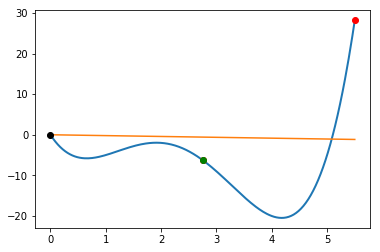

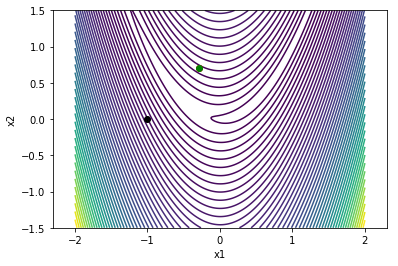

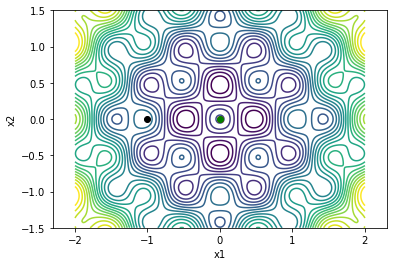

In [52]:
import numpy as np
import matplotlib.pylab as plt

def fonedim(x, linesearch=False, symb='ko'):
    f = -x[0] + x[0]*(x[0] - 5)*(2 - x[0])**2
    if linesearch:
        plt.plot(x[0], f, symb)
    return f

def fonedim_grad(x):
    return np.array([-21 + 48*x[0] - 27*x[0]**2 + 4*x[0]**3])
    
def rosen(x, linesearch=False, symb='ko'):
    '''If the linesearch flag is true, plot the point'''
    if linesearch:
        plt.plot([x[0]], [x[1]], symb)
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

def rosen_grad(x):
    return np.array([-2*(1 - x[0]) - 200*(x[1] - x[0]**2)*x[0], 
                      200*(x[1] - x[0]**2) ])

def griewank(x, linesearch=False, symb='ko'):
    if linesearch:
        plt.plot([x[0]], [x[1]], symb)
    return x[0]**2 + x[1]**2 + np.cos(2*np.pi*x[0])*np.cos(2*np.pi*x[1])

def griewank_grad(x):
    return np.array([2*x[0] - 2*np.pi*np.sin(2*np.pi*x[0])*np.cos(2*np.pi*x[1]),
                     2*x[1] - 2*np.pi*np.cos(2*np.pi*x[0])*np.sin(2*np.pi*x[1])])

def onedim_plot(func, n=250, xhigh=5.0):
    x = np.linspace(0, xhigh, n)
    f = np.zeros(n)
    for i in range(n):
        f[i] = func([x[i]])
    plt.figure()
    plt.plot(x, f, linewidth=2)
    return

def contour_plot(func, n=250, xlow=-2, xhigh=2, ylow=-1.5, yhigh=1.5):
    '''Create a contour plot of the function'''
    x = np.linspace(xlow, xhigh, n)
    y = np.linspace(ylow, yhigh, n)
    X, Y = np.meshgrid(x, y)
    f = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            f[i, j] = func([X[i, j], Y[i, j]])

    plt.figure()
    if func == rosen:
        plt.contour(X, Y, f, levels=np.max(f)*np.linspace(0, 1.0, 50)**2)
    else:
        plt.contour(X, Y, f, levels=np.linspace(np.min(f), np.max(f), 25))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')    
    return
    
def backtrack(func, grad_func, x, p, 
              tau=0.5, alpha=1.0, c1=1e-3, max_iter=100):
    '''
    Given the function pointer and the gradient function pointer,
    find a step length alpha that satisfies the sufficient decrease
    conditions.
    '''
    
    # Evaluate the function and gradient at the initial point x
    phi0 = func(x, linesearch=True)
    grad0 = grad_func(x)
    
    # Compute the derivative of the merit function at alpha = 0.0
    dphi0 = np.dot(grad0, p)
    
    # Check for a descent direction
    if dphi0 >= 0.0:
        return ValueError('Must provide a descent direction')
    
    for i in range(max_iter):
        # Evaluate the function at the new point
        xp = x + alpha*p
        phi = func(xp, linesearch=True, symb='ro')
        
        # Check the sufficient decrease condition
        if phi < phi0 + c1*alpha*dphi0:
            # Evaluate the function again to illustrate the final point
            func(xp, linesearch=True, symb='go')
            return alpha
        else:
            print 'Sufficient decrease failed with alpha = %15.8e'%(alpha)
            print 'phi(alpha) =                            %15.8e'%(phi)
            print 'phi0 + c1*alpha*dphi0 =                 %15.8e'%(phi0 + c1*alpha*dphi0)
        
        # Set the alpha values and append one to the list
        alpha = tau*alpha
    
    # The line search has failed at this point
    return 0.0

# Plot the one dimensional problem
x = np.array([0])
p = np.array([5.5])
onedim_plot(fonedim, xhigh=5.5)

# Plot the sufficient decrease line on the plot
phi0 = fonedim(x)
dphi0 = np.dot(fonedim_grad(x), p)
xhigh = 5.5
alph = p[0]
c1 = 0.01
plt.plot([0.0, xhigh], [phi0, phi0 + c1*(xhigh/alph)*dphi0])

# Perform a backtracking line search
backtrack(fonedim, fonedim_grad, x, p)

# Create a contour plot
contour_plot(rosen)

# Choose an initial point and the gradient direction
x = np.array([-1, 0])
p = -rosen_grad(x)
p = p/np.sqrt(np.dot(p, p))

# Perform a backtracking line search
backtrack(rosen, rosen_grad, x, p)

# Create a contour plot
contour_plot(griewank)

p = -griewank_grad(x)
p = p/np.sqrt(np.dot(p, p))

# Perform a backtracking line search
backtrack(griewank, griewank_grad, x, p)


## Strong Wolfe condition line search

The strong Wolfe conditions combine both the sufficient decrease condition as well as a curvature condition given as

\begin{equation*}
    |\phi'(\alpha)| \le c_{2} |\phi'(0)|.
\end{equation*}

This curvature condition is much more challenging to satisfy compared with the sufficient decrease conditions alone.

The following line search algorithm works in two stages: (1) An initial stage in which an interval is found which contains a point that satisfies the strong Wolfe conditions; (2) A second "zoom" phase in which the interval from the first phase is bracketed until a new point is found.

An interval $[0, \alpha]$ will contain a step length that satisfies the strong Wolfe conditions if (1) the sufficient decrease conditions are violated at the point $\alpha$. Or (2), the sufficient decrease condition is satisfied at $\alpha$ and the slope of the merit function satisfies $\phi'(\alpha) > 0$. Try to convince yourself that this is true by sketching merit functions with the line search criteria.

The first phase of the algorithm works by expanding the maximum step length and testing these two criteria. If we find a step length that satisfies the strong Wolfe conditions along the way, then the strong Wolfe condition line search returns the value of the step length.

### Zoom phase

The zoom phase of the algorithm uses two values of $\alpha_{low}$ and $\alpha_{high}$. These are defined such that $\phi(\alpha_{low}) \le \phi(\alpha_{high})$. (Note: it does not refer to the values of $\alpha$ itself.)

The values of $\alpha_{low}$ and $\alpha_{high}$ are also chosen so that (1) the value of $\phi(\alpha_{low})$ is the lowest value of the merit function evaluated so far that satisfies the sufficient decrease condition, and (2) the interval satisfies the property $\phi'(\alpha_{low})(\alpha_{high} - \alpha_{low}) < 0$. This second condition ensures that the interval contains steps satisfying the strong Wolfe conditions.

The zoom function works by finding a new point, $\alpha_{j}$, within the interval between $\alpha_{low}$ and $\alpha_{high}$ and testing whether this point satisfies the strong Wolfe conditions. If the new point $\alpha_{j}$ violates the sufficient decrease conditions or the value of the merit function $\phi(\alpha_{j}) \ge \phi(\alpha_{low})$, then $\alpha_{j}$ becomes the new $\alpha_{high}$. 

If the sufficient decrease condition is satisfied by $\alpha_{j}$, then the curvature condition is checked and if it is satisfied, the line search terminates. Otherwise at this new point, we know that $\alpha_{j}$ is lower than $\alpha_{low}$ and satisfies the sufficient decrease conditions, so $\alpha_{j}$ becomes the new $\alpha_{low}$. The new $\alpha_{high}$ is selected to satisfy the criteria $\phi'(\alpha_{low})(\alpha_{high} - \alpha_{low}) < 0$.

Sufficient decrease conditions violated: interval found
Zoom: Curvature condition violated
Zoom: Wolfe conditions satisfied
Slope condition violated; interval found
Zoom: Curvature condition violated
Zoom: Wolfe conditions satisfied


1.75

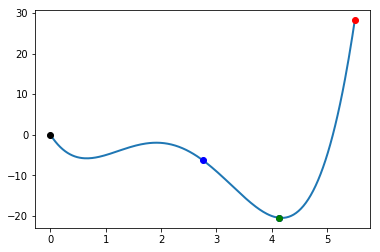

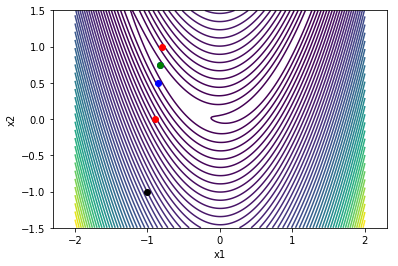

In [57]:
def strong_wolfe(func, grad_func, x, pk, c1=1e-3, c2=0.9,
                 alpha=1.0, alpha_max=100.0, max_iters=100):
    '''
    Strong Wolfe condition line search method 

    Input:
    func:      the function pointer
    grad_func: the gradien function pointer
    x:         the design variables
    p:         the search direction
    alpha:     the initial estimate for the step length
    alpha_max: the maximum value of alpha 

    returns:
    alpha:     the step length satisfying the strong Wolfe conditions
    '''
    
    # Compute the function and the gradient at alpha = 0
    fk = func(x, linesearch=True)
    gk = grad_func(x)

    # Compute the dot product of the gradient with the search
    # direction to evaluate the derivative of the merit function
    proj_gk = np.dot(gk, pk)

    # Store the old value of the objective
    fj_old = fk
    proj_gj_old = proj_gk
    alpha_old = 0.0

    for j in xrange(max_iters):
        # Evaluate the merit function
        fj = func(x + alpha*pk, linesearch=True, symb='ro')

        # Evaluate the gradient at the new point
        gj = grad_func(x + alpha*pk)
        proj_gj = np.dot(gj, pk)

        # Check if either the sufficient decrease condition is
        # violated or the objective increased
        if (fj > fk + c1*alpha*proj_gk or
            (j > 0 and fj > fj_old)):
            print 'Sufficient decrease conditions violated: interval found'
            # Zoom and return
            return zoom(func, grad_func, fj_old, proj_gj_old, alpha_old, 
                        fj, proj_gj, alpha,
                        x, fk, gk, pk, c1=c1, c2=c2)

        # Check if the strong Wolfe conditions are satisfied
        if np.fabs(proj_gj) <= c2*np.fabs(proj_gk):
            print 'Strong Wolfe alpha found directly'
            func(x + alpha*pk, linesearch=True, symb='go')
            return alpha

        # If the line search is vioalted
        if proj_gj >= 0.0:
            print 'Slope condition violated; interval found'
            return zoom(func, grad_func, fj, proj_gj, alpha, 
                        fj_old, proj_gj_old, alpha_old,
                        x, fk, gk, pk, c1=c1, c2=c2)

        # Record the old values of alpha and fj
        fj_old = fj
        proj_gj_old = proj_gj
        alpha_old = alpha

        # Pick a new value for alpha
        alpha = min(2.0*alpha, alpha_max)

        if alpha >= alpha_max:
            print 'Line search failed here'
            return None

    print 'Line search unsuccessful'
    return alpha

def zoom(func, grad_func, f_low, proj_low, alpha_low, 
         f_high, proj_high, alpha_high,
         x, fk, gk, pk, c1=1e-3, c2=0.9, max_iters=100):
    '''
    Zoom function: Locate a value between alpha_low and alpha_high
    that satisfies the strong Wolfe conditions. Remember:
    alpha_low/alpha_high are step lengths yielding the
    lowest/higher values of the merit function. 

    input:
    f_low:      the value of f(x) at alpha_low
    proj_low:   the value of the derivative of phi at alpha_low
    alpha_low:  the value of the step at alpha_low
    f_high:     the value of f(x) at alpha_high
    proj_high:  the value of the derivative of phi at alpha_high
    alpha_high: the value of the step at alpha_high
    x:          the value of the design variables at alpha = 0
    fk:         the value of the function at alpha = 0
    gk:         the gradient of the function at alpha = 0
    pk:         the line search direction

    returns:
    alpha:   a step length satisfying the strong Wolfe conditions
    '''

    proj_gk = np.dot(pk, gk)

    for j in xrange(max_iters):
        # Pick an alpha value using cubic interpolation
        # alpha_j = cubic_interp(alpha_low, f_low, proj_low,
        #                        alpha_high, f_high, proj_high)

        # Pick an alpha value by bisecting the interval
        alpha_j = 0.5*(alpha_high + alpha_low)

        # Evaluate the merit function
        fj = func(x + alpha_j*pk, linesearch=True, symb='bo')

        # Check if the sufficient decrease condition is violated
        if fj > fk + c1*alpha_j or fj >= f_low:
            print 'Zoom: Sufficient decrease conditions violated'
            alpha_high = alpha_j
            f_high = fj

            # We need the derivative here for proj_high
            gj = grad_func(x + alpha_j*pk)
            proj_high = np.dot(gj, pk)
        else:
            # Evaluate the gradient of the function and the
            # derivative of the merit function
            gj = grad_func(x + alpha_j*pk)
            proj_gj = np.dot(gj, pk)

            # Return alpha, the strong Wolfe conditions are
            # satisfied
            if np.fabs(proj_gj) <= c2*np.fabs(proj_gk):
                print 'Zoom: Wolfe conditions satisfied'
                func(x + alpha_j*pk, linesearch=True, symb='go')
                return alpha_j
            else:
                 print 'Zoom: Curvature condition violated'

            # Make sure that we have the intervals right
            if proj_gj*(alpha_high - alpha_low) >= 0.0:
                # Swap alpha high/alpha low
                alpha_high = alpha_low
                proj_high = proj_low
                f_high = f_low

            # Swap alpha low/alpha j
            alpha_low = alpha_j
            proj_low = proj_gj
            f_low = fj

    return alpha_j

def cubic_interp(self, x0, m0, dm0, x1, m1, dm1):
    '''
    Return an x in the interval (x0, x1) that minimizes a cubic
    interpolant between two points with both function and
    derivative values.

    This method does not assume that x0 > x1. If the solution is
    not in the interval, the function returns the mid-point.
    '''

    # Compute d1
    d1 = dm0 + dm1 - 3*(m0 - m1)/(x0 - x1)

    # Check that the square root will be real in the
    # expression for d2
    if (d1**2 - dm0*dm1) < 0.0:
        print 'Cubic interpolation fail'
        return 0.5*(x0 + x1)

    # Compute d2
    d2 = np.sign(x1 - x0)*np.sqrt(d1**2 - dm0*dm1)

    # Evaluate the new interpolation point
    x = x1 - (x1 - x0)*(dm1 + d2 - d1)/(dm1 - dm0 + 2*d2)

    # If the new point is outside the interval, return
    # the mid point
    if x1 > x0 and (x > x1 or x < x0):
        return 0.5*(x0 + x1)
    elif x0 > x1 and (x > x0 or x < x1):
        return 0.5*(x0 + x1)

    return x

# Plot the one dimensional problem
x = np.array([0])
p = np.array([5.5])
onedim_plot(fonedim, xhigh=5.5)

# Perform a backtracking line search
strong_wolfe(fonedim, fonedim_grad, x, p, c2=0.1)

# Choose an initial point and the gradient direction
x = np.array([-1, -1])
# p = -rosen_grad(x)
# p = *p/np.sqrt(np.dot(p, p))
p = np.array([0.1, 1])

# Create a contour plot
contour_plot(rosen)

# Perform a backtracking line search
strong_wolfe(rosen, rosen_grad, x, p, c2=0.1)